In [1]:
import numpy as np
from random import uniform, choice
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_xys(xy_l_tuples,sz=15):
    t_yes = [a[0] for a in xy_l_tuples if a[1] == 1]
    t_no = [a[0] for a in xy_l_tuples if a[1] == 0]
    plt.plot([x for (x,y) in t_yes],[y for (x,y) in t_yes],'go',markersize=sz)
    plt.plot([x for (x,y) in t_no],[y for (x,y) in t_no],'ro',markersize=sz)

In [28]:
def tuple_append(tpl,elt):
    return tuple(list(tpl)+[elt])

def perceptron(training, epochs):
    # some parameters, maybe interesting to make these arguments
    rate = 1.0
    # how many weights do we need?
    feature_count = len(training[0][0])
    # pad each training example with a dummy 1 input
    training = [(tuple_append(ins,1), label) for (ins,label) in training]
    print(training)
    # initialize weights to random values
    weights = [uniform(0,0.05) for _r in range(0,feature_count+1)]
    print('initial weights', weights)
    # let's store the errors found during training
    errors = []
    for i in range(0,epochs):
        # in each epoch, pick a subset of the training set (just one for now)
        (example,actual) = choice(training)
        # calculate the perceptron activation and the predicted category
        # Note: You can use dot(vec1, vec2) to get the dot product between two sequential collections.
        activation = np.dot(example, weights)
        predicted = 1 if activation >= 0 else 0

        # calculate the error between predicted and actual and add it to errors
        error = actual - predicted
        errors.append(error)
        
        # update each weight according to the perceptron update rule       
        for i in range(0,len(weights)):
            weights[i] += example[i] * error

    print('adjusted weights', weights)
    return (errors,weights)

[((0, 0, 1), 0), ((0, 1, 1), 0), ((1, 0, 1), 0), ((1, 1, 1), 1)]
initial weights [0.03219114949126713, 0.028854318156770888, 0.006478018993000246]
adjusted weights [2.0321911494912674, 1.028854318156771, -2.9935219810069995]


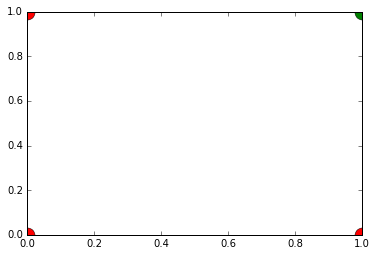

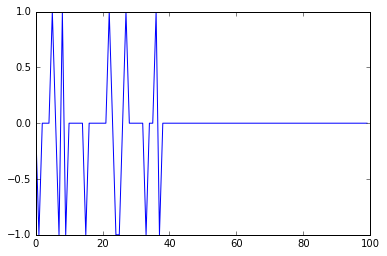

In [29]:
and_set = [((0,0),0), ((0,1),0), ((1,0),0), ((1,1),1)]
plot_xys(and_set)

(errs,_) = perceptron(and_set,100)
plt.figure()
plt.plot(errs)

[((0, 0, 1), 0), ((0, 1, 1), 1), ((1, 0, 1), 1), ((1, 1, 1), 1)]
initial weights [0.02817928464156007, 0.0011514099833152991, 0.033704972111127454]
adjusted weights [1.02817928464156, 1.0011514099833152, -0.9662950278888726]


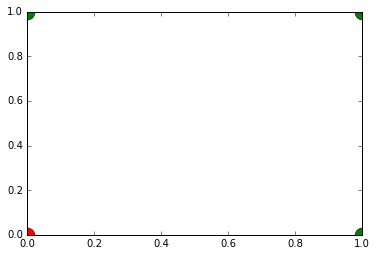

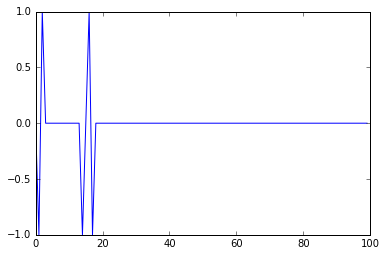

In [30]:
or_set = [((0,0),0), ((0,1),1), ((1,0),1), ((1,1),1)]
plot_xys(or_set)

(errs,_) = perceptron(or_set,100)
plt.figure()
plt.plot(errs)

[((0, 0, 1), 0), ((0, 1, 1), 1), ((1, 0, 1), 1), ((1, 1, 1), 0)]
initial weights [0.008243920067559307, 0.027085780531171236, 2.588759021687759e-06]
adjusted weights [-0.9917560799324407, -0.9729142194688287, -0.9999974112409782]


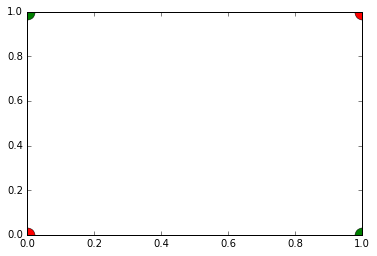

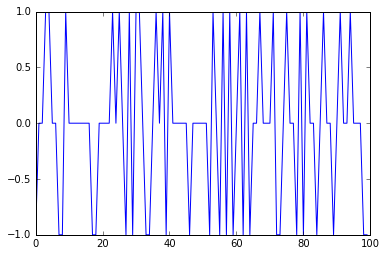

In [31]:
xor_set = [((0,0),0), ((0,1),1), ((1,0),1), ((1,1),0)]
plot_xys(xor_set)

(errs,_) = perceptron(xor_set,100)
plt.figure()
plt.plot(errs)

[((4.700273444638325, 1.1032613057494245, 1), 0), ((0.7822698974903219, 2.6538281184215795, 1), 1), ((9.559811427127343, 1.9458987304060416, 1), 0), ((0.22283132714437492, 8.139088748762312, 1), 1), ((4.268512489904987, 1.223998099944098, 1), 0), ((9.333015465427767, 3.4602657782372837, 1), 0), ((1.062332571899205, 4.72441059005285, 1), 1), ((4.355736161176612, 1.0003652413313135, 1), 0), ((0.14799929328132455, 1.2465176864063154, 1), 1), ((8.682100422949576, 4.665048434883085, 1), 0), ((0.9795310907217669, 6.077135910150559, 1), 1), ((4.201910538695025, 6.37308537596331, 1), 0), ((5.314890413714196, 6.656685793352733, 1), 0), ((4.580173549350917, 6.804435161547562, 1), 0), ((2.0279037729435934, 4.802830848727396, 1), 1), ((6.572087095183568, 2.0544634541395155, 1), 0), ((5.412223698382697, 8.677423390029983, 1), 0), ((5.911473901532163, 8.86292475569177, 1), 0), ((7.63326569136344, 6.442432193514885, 1), 0), ((3.2127352490901617, 1.7763446646049186, 1), 0), ((4.510231219205542, 7.8856

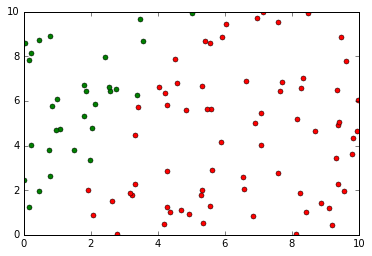

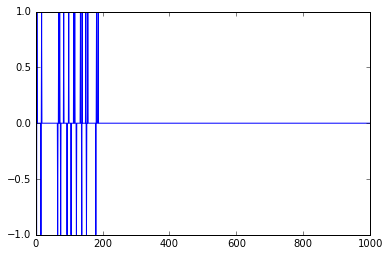

In [32]:
noise_chance = 0.0
N = 100
xys = [(uniform(0,10),uniform(0,10)) for _r in range(0,N)]
secret_f = lambda x: x*2 - 1
dataset = [(xy,(1 if (secret_f(xy[0]) <= xy[1] or uniform(0,1)<noise_chance) else 0)) for xy in xys]
plot_xys(dataset,5)

trials = 1000
(errs,weights) = perceptron(dataset,trials)
plt.figure()
plt.plot(errs)

validation_N = 100
# note the bounds here are a bit different, but we hope to generalize a bit from the training set
val_xys = [(uniform(5,20),uniform(5,20)) for _r in range(0,validation_N)]
validation = [(tuple_append(xy,1),(1 if secret_f(xy[0]) <= xy[1] else 0)) for xy in val_xys]
val_net_error = 0
for (example,actual) in validation:
    # get the prediction based on the weights, calculate the (absolute) error and add it to the net error
    pass
val_error = val_net_error/len(validation)
print("Validation error:",val_error)